In [ ]:
# stdlib
import os
from pathlib import Path

from syft_rds.orchestra import setup_rds_server

import syft_flwr

## Step 1: Setup RDS Server

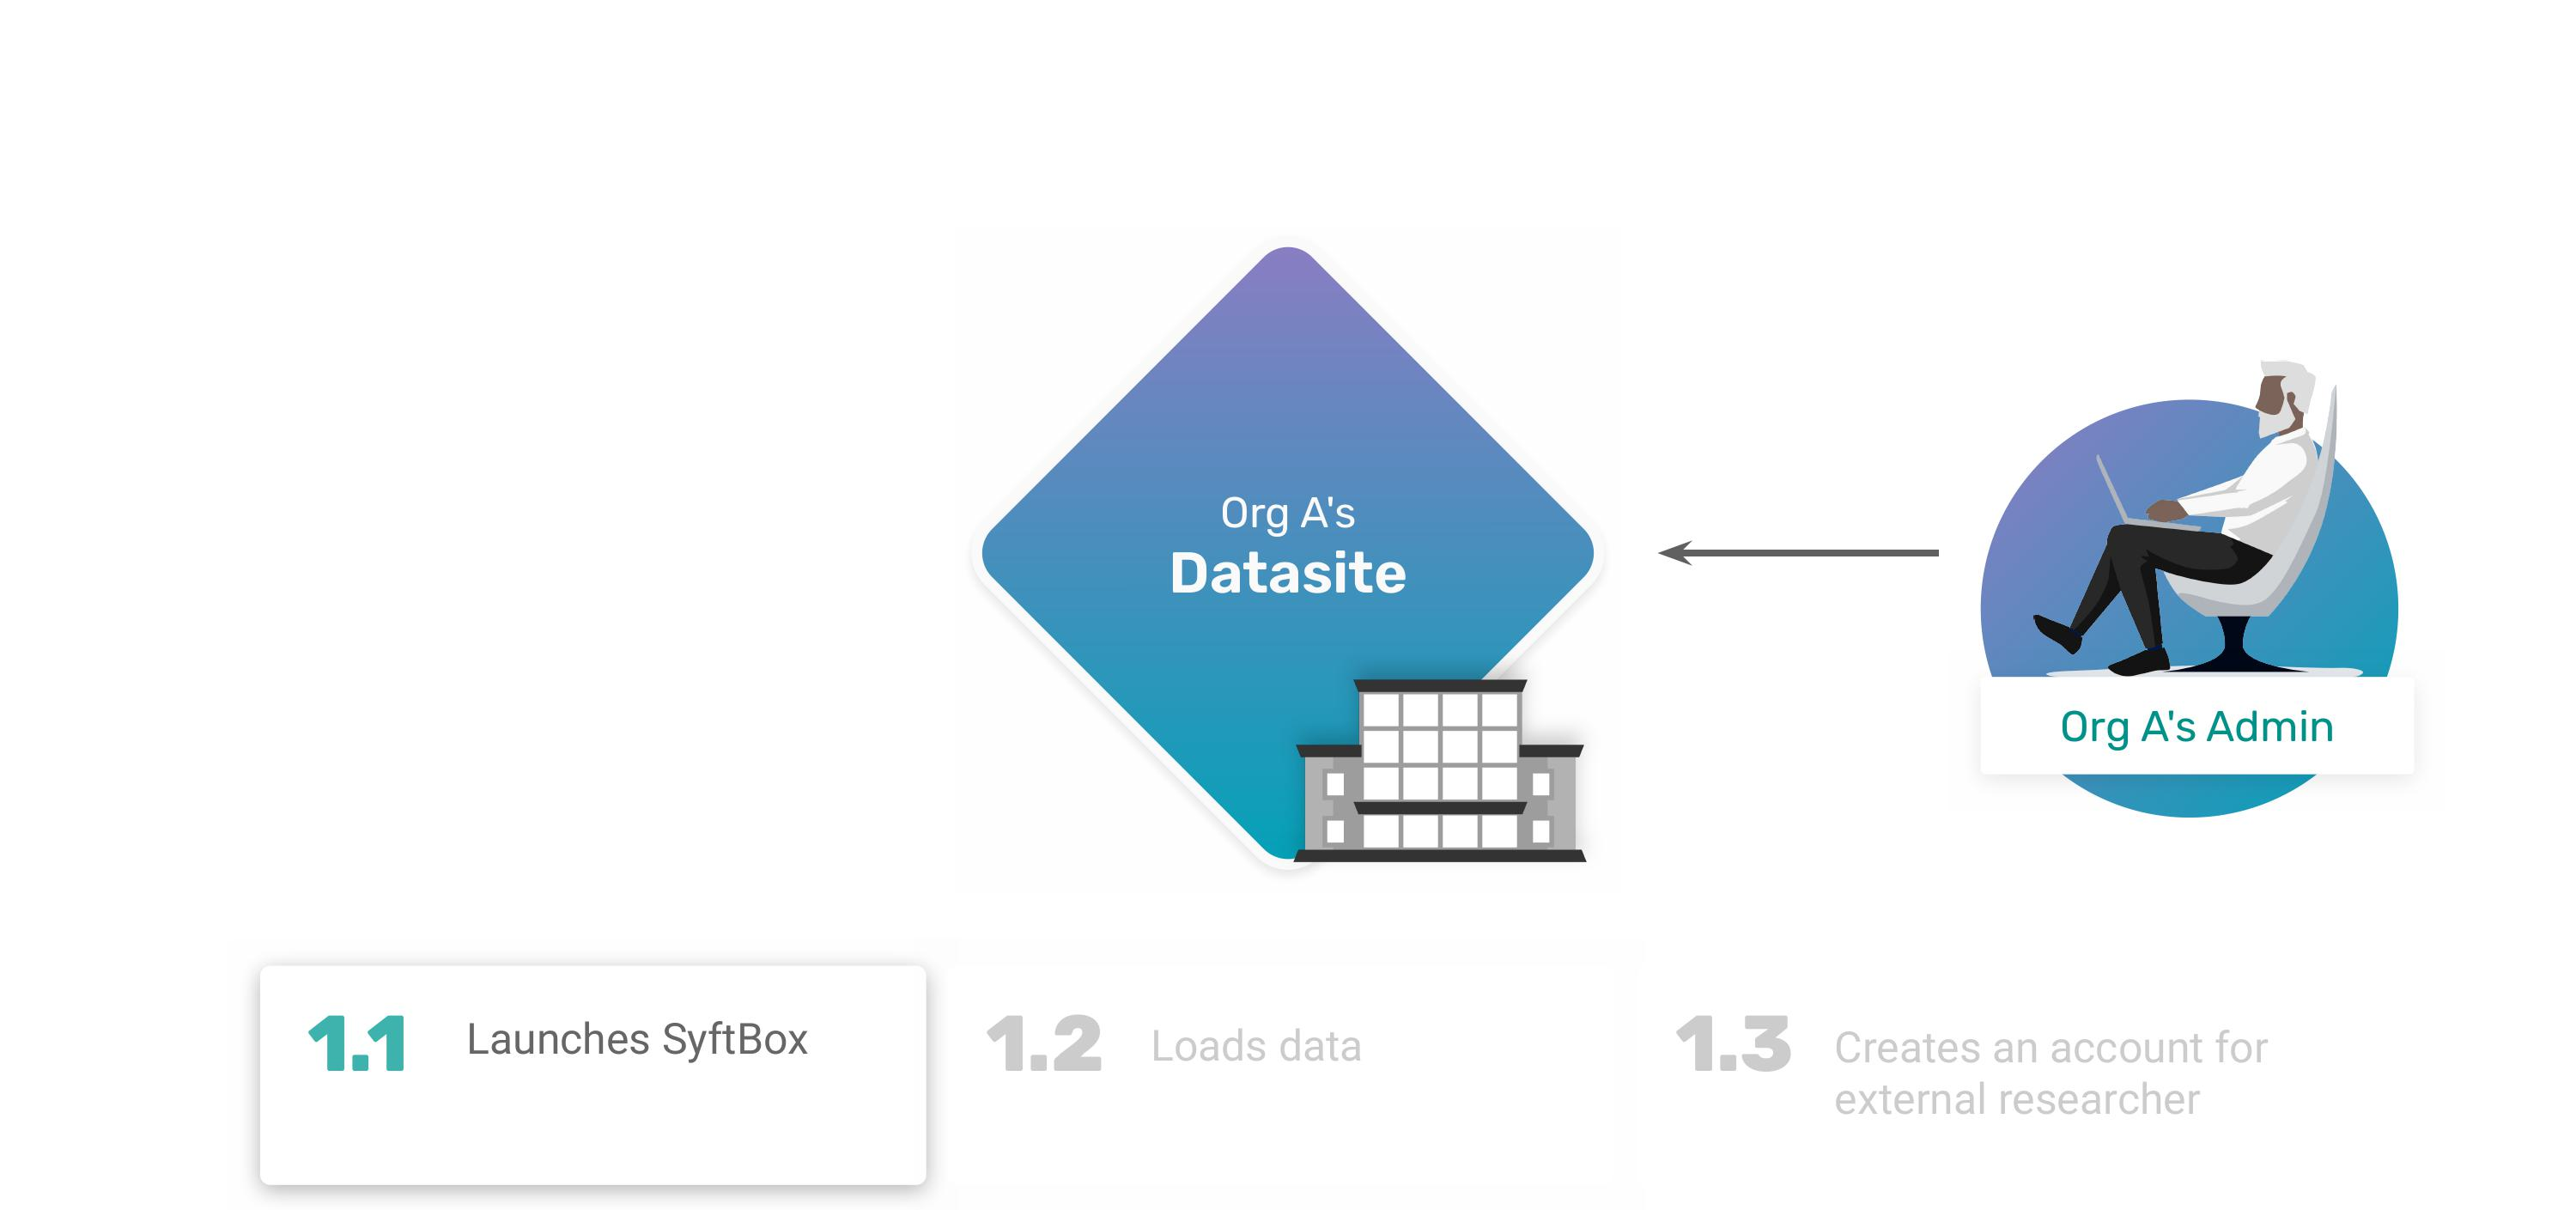

In [ ]:
do_stack_2 = setup_rds_server(email="do2@openmined.org", key="flwr")

In [ ]:
do_client_2 = do_stack_2.init_session(host="do2@openmined.org")

In [ ]:
do_client_2.is_admin

## Step 2.1: Download Mock Dataset

In [ ]:
FLWR_PROJECT = "quickstart-pytorch"
SYFTBOX_DATASET_NAME = "cifar10"

DATASET_DIR = Path("./datasets/").expanduser().absolute()
FLWR_PROJECT_PATH = Path(f"{FLWR_PROJECT}")

DATASET_NAME = f"{SYFTBOX_DATASET_NAME}_part_2"

print(f"{DATASET_DIR = }")
print(f"{FLWR_PROJECT_PATH = }")
print(f"{DATASET_NAME = }")

In [ ]:
syft_flwr.utils.save_dataset_to_disk(
    dataset_name=SYFTBOX_DATASET_NAME, dataset_dir=DATASET_DIR, num_partitions=2
)

## Step 2.2: Load Dataset to SyftBox

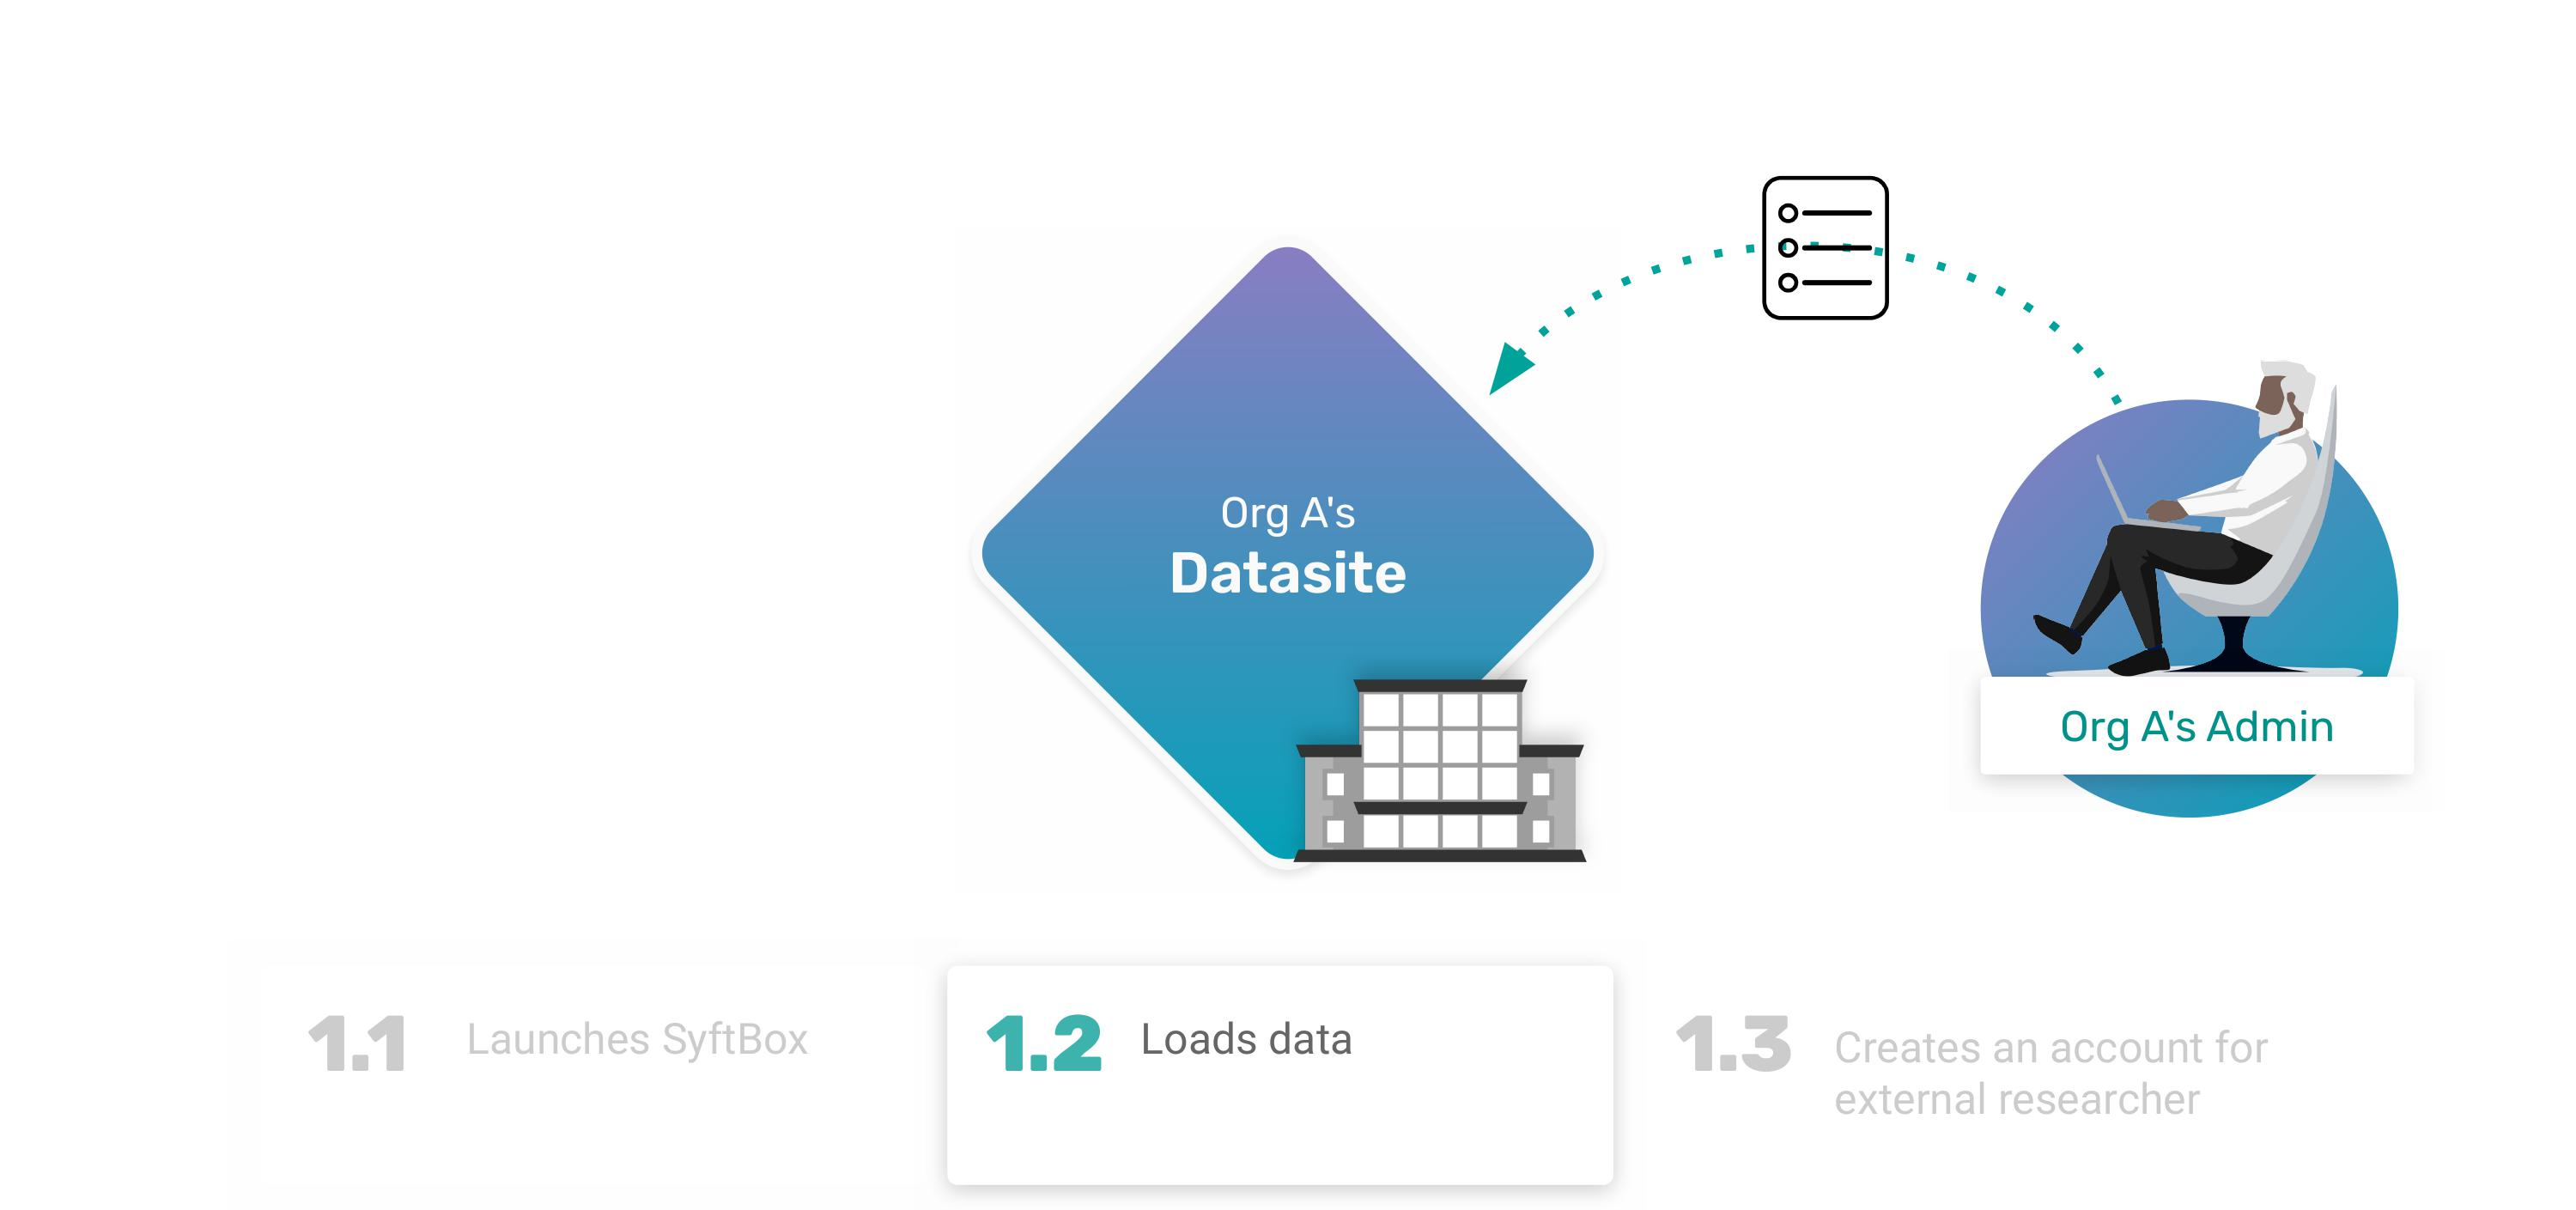

In [ ]:
DATASET_PRIVATE_PATH = DATASET_DIR / SYFTBOX_DATASET_NAME / DATASET_NAME
DATASET_MOCK_PATH = DATASET_DIR / SYFTBOX_DATASET_NAME / DATASET_NAME
README_PATH = FLWR_PROJECT_PATH / "README.md"

try:
    dataset = do_client_2.dataset.create(
        name=SYFTBOX_DATASET_NAME,
        summary=f"Partitioned {SYFTBOX_DATASET_NAME} dataset.",
        description_path=README_PATH,
        path=DATASET_PRIVATE_PATH,
        mock_path=DATASET_MOCK_PATH,
    )
    dataset.describe()
except Exception as e:
    print(f"Error: {e}")

In [ ]:
do_client_2.datasets

## Step 3: DO Review Jobs

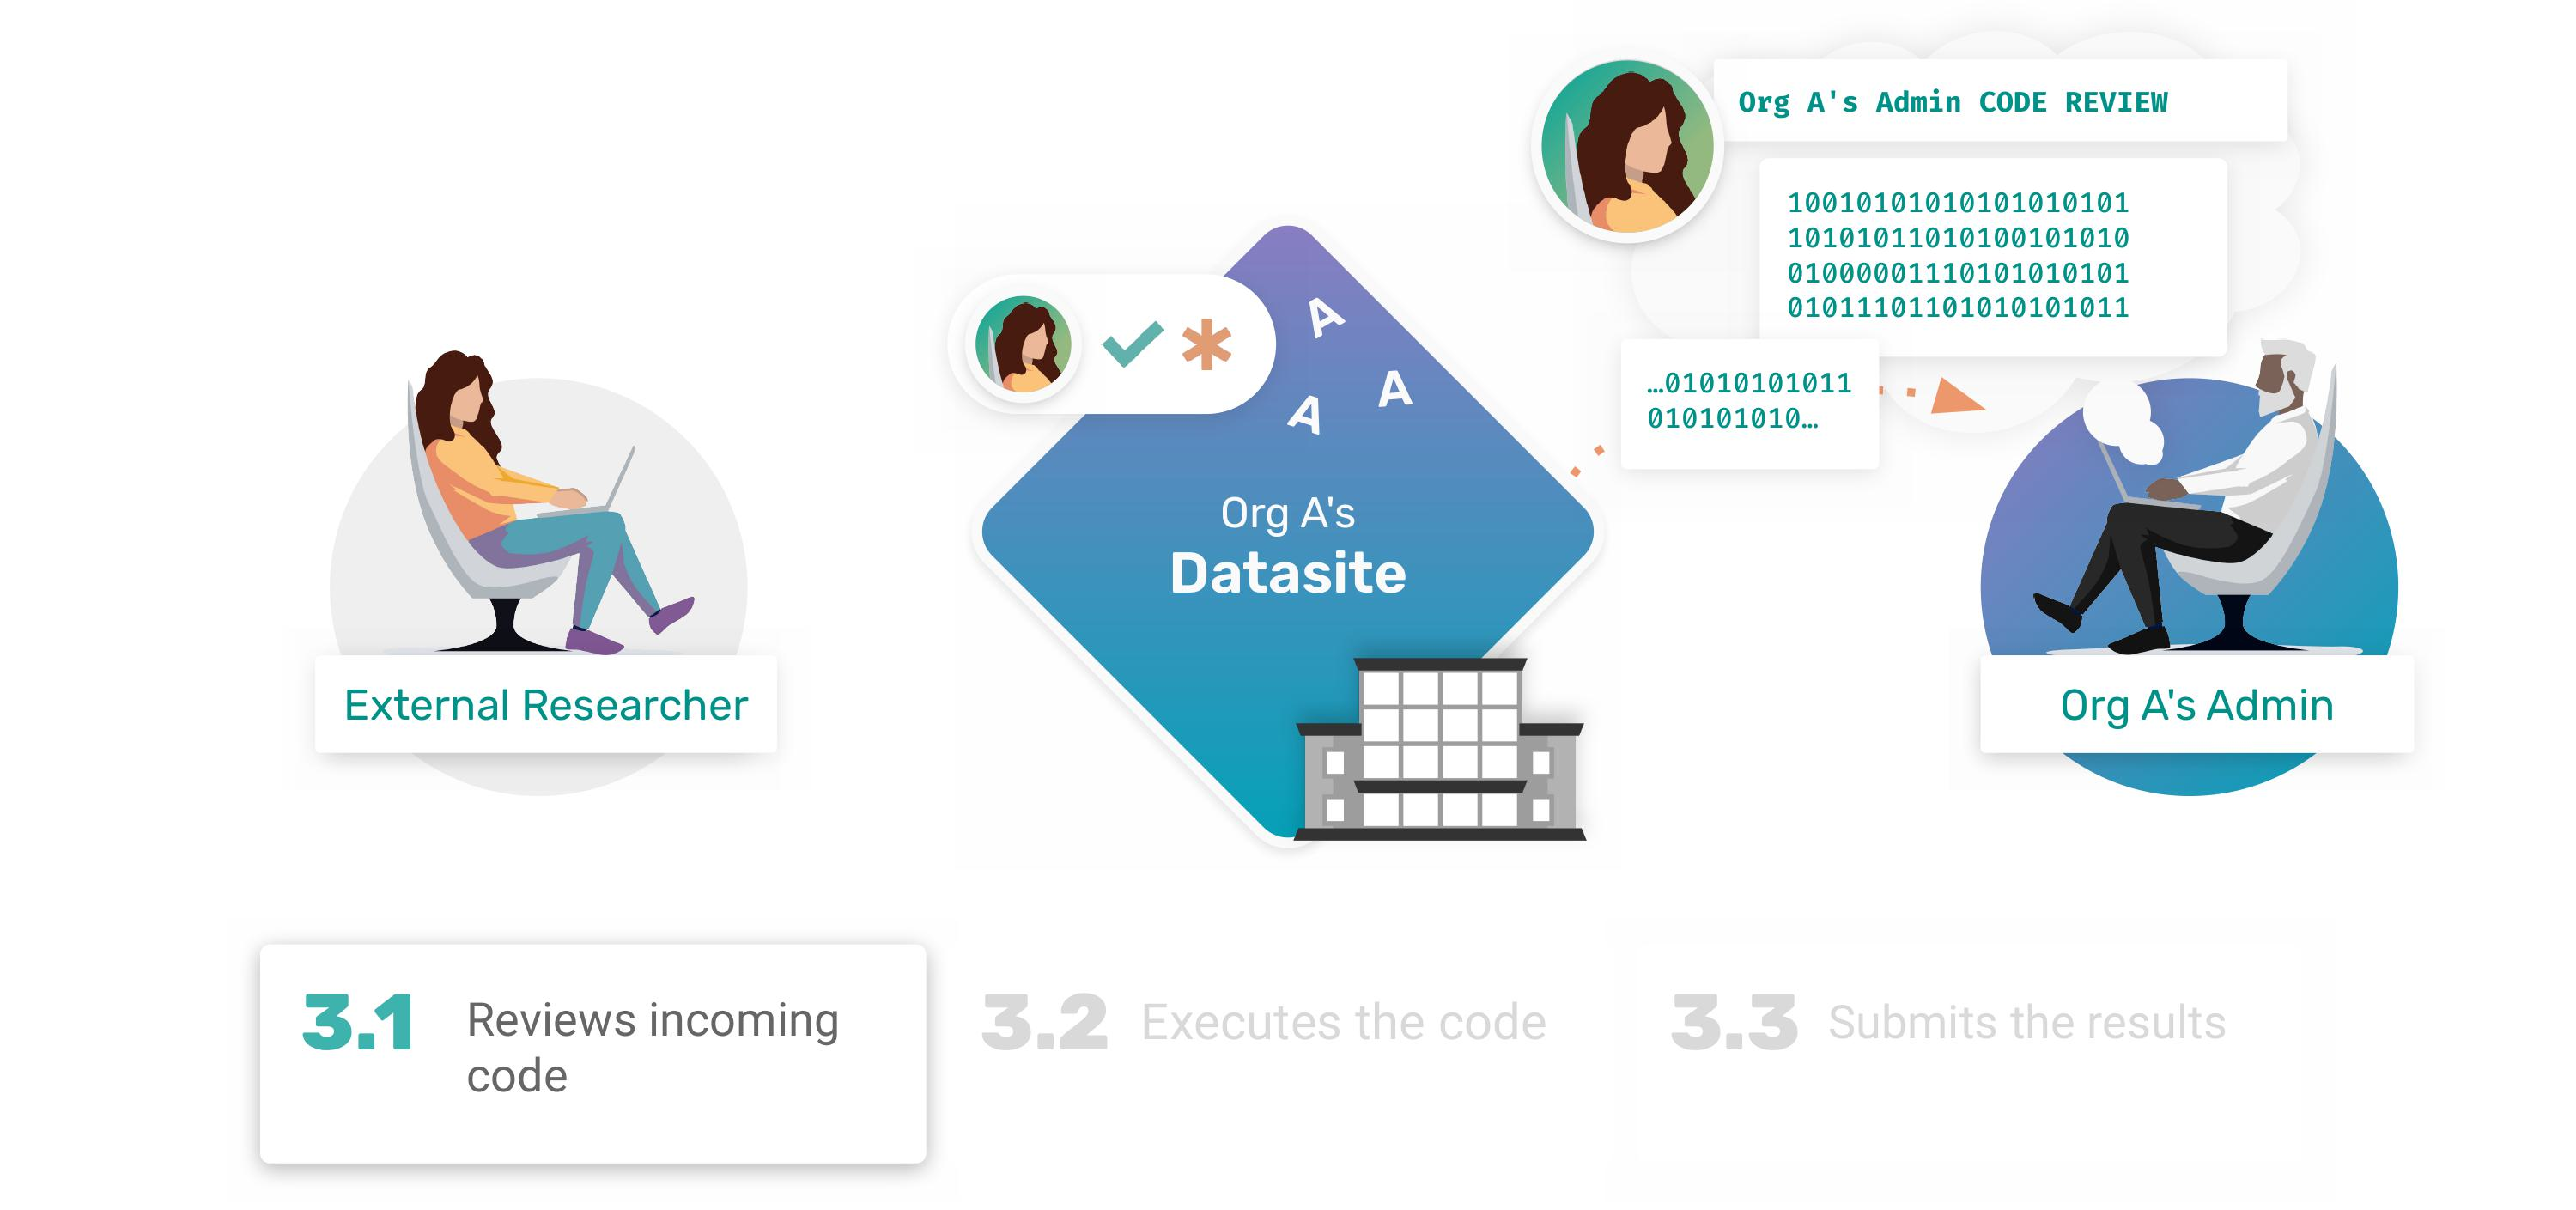

In [ ]:
jobs = do_client_2.jobs.get_all(status="pending_code_review")

jobs

In [ ]:
job = jobs[-1]
job

In [ ]:
# same as job.code.describe()
job.show_user_code()

## Step 4: DO Executes Job

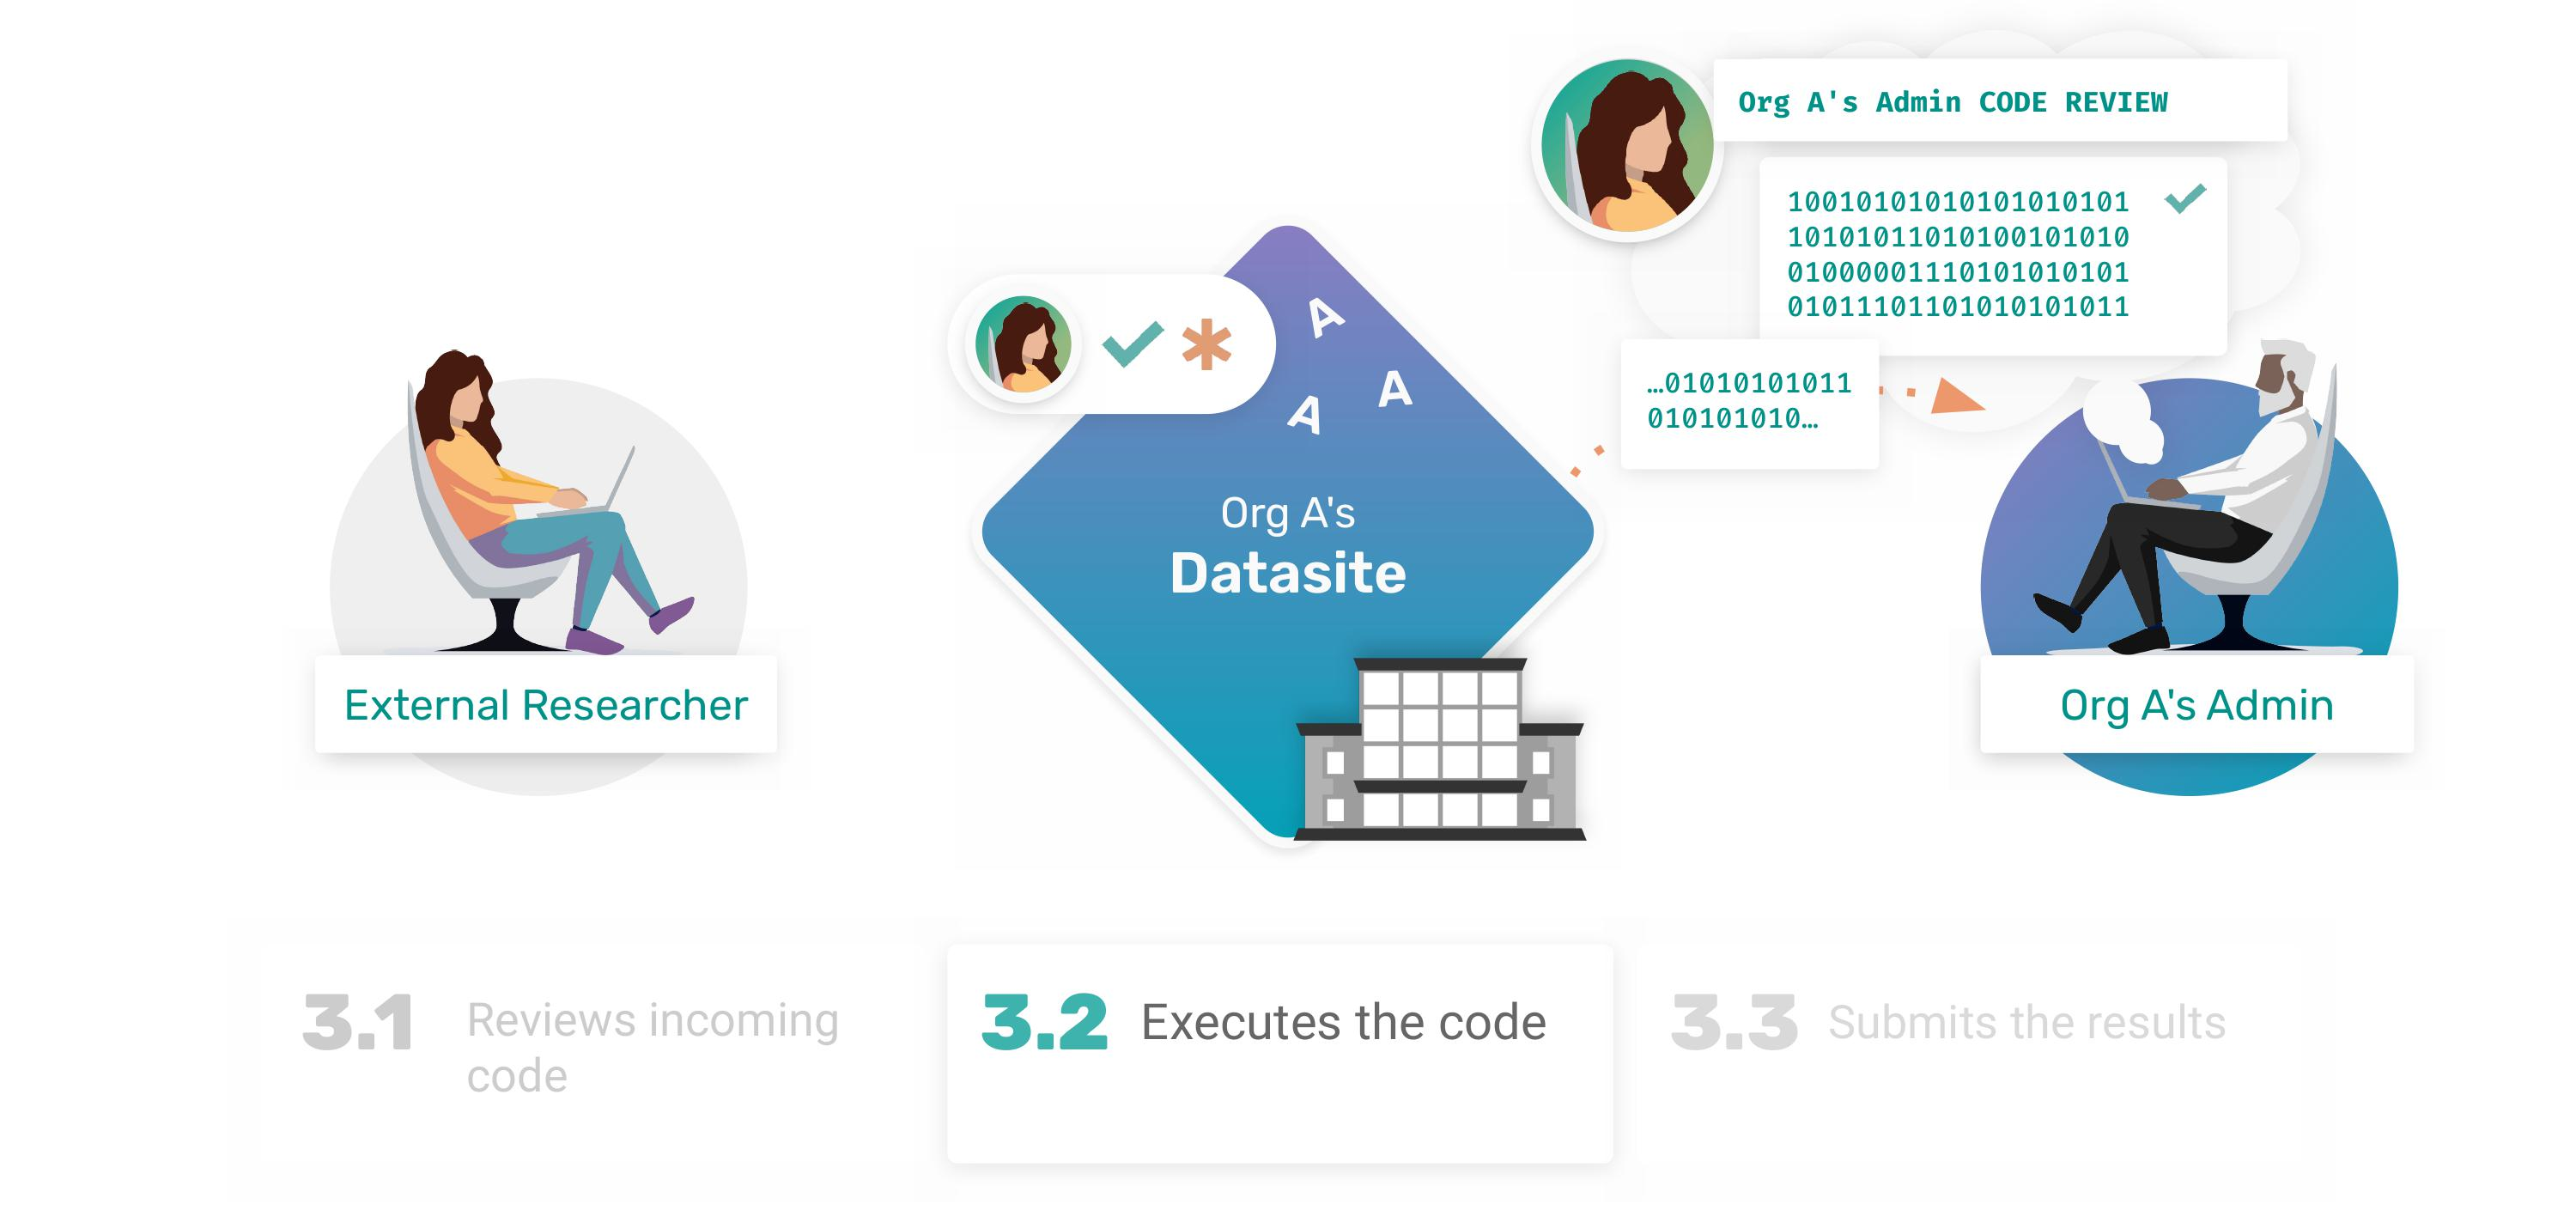

In [ ]:
os.environ["SYFTBOX_CLIENT_CONFIG_PATH"] = str(do_stack_2.client.config_path)
res_job = do_client_2.run_private(job)

## Step 5: Stop Server

In [ ]:
do_stack_2.stop()